# Questions

**Question 1:  What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.**
  - Deep learning is a subset of machine learning that focuses on using neural network layers to learn complex patterns in large datasets.
  - These networks are capable of automatically extracting features from raw data without the need for manual feature engineering.
  - Deep learning is usefull in areas such as image recognition, speech processing and natural language processing.
  - Deep learning requires large volumes of labeled data to train effectively for tasks like image or speech recognition. Whereas traditional machine learning techniques often perform well with smaller datasets.
  - Deep learning models are much more complex and consist of many layers of neurons. These models are capable of learning complex data. Whereas traditional machine learning models are generally simpler and rely on shallower learning architectures.

**Question 2: Explain the basic architecture and functioning of a Perceptron. What are its limitations?**
  - A Perceptron is one of the simplest types of artificial neural networks and forms the foundation for more complex neural network models.
  - It is a single-layer neural network designed to perform binary classification.
  - A perceptron consists of:-
    - Input Layer:- The perceptron receives inputs which are usually numerical values representing features of the data.
    - Weights:- Each input value x is multiplied by a corresponding weight w.The weight w controls the strength of the connection between the input and the output.
    - Bias:- A bias term b is added to the weighted sum of inputs. The bias allows the perceptron to shift the decision boundary, making it more flexible and allowing the model to fit data that isn't strictly separable through the origin.
    - Activation Function:- The perceptron uses an activation function to produce an output based on the weighted sum of inputs.
    - Output:- The perceptron ultimately outputs a class label based on the input and the learned weights.
  - Limitations of perceptron:-
    - Single-layer perceptron can only solve problems where the data is linearly separable. This means that the two classes must be separable by a straight line.
    - Single-layer perceptron can only learn linear decision boundaries. It is not capable of learning complex or non-linear relationships between inputs and outputs.
  

**Question 3: Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.**
  - An activation function determines whether a neuron should be activated or not by introducing non linearity into the neural network.
  - Without activation functions, a neural network would behave like a linear model.
  - It decide the output of a neuron based on its weighted input.
  - Sigmoid Function:-
    - It convert output into a range of 0 to 1.
    - It can be interpreted as probabilities.
  - ReLU:-
    - It converts output in the range of 0 to infinity.
    - It reduces vanishing gradient.
  - Tanh:-
    - It converts output in the range of -1 to 1.
    - Better than Sigmoid.


**Question 4: What is the difference between Loss function and Cost function in neural networks? Provide examples.**
  - Loss Function:-
    - A loss function measures the error for a single training example.
    - It quantifies how far the predicted output is from the actual output for one data point.
    - example:- Mean Squared Error and Binary Cross Entropy.
  - Cost Function:-
    - A cost function measures the overall error across the entire training dataset.
    - It is usually defined as the average of the individual loss values.
    - example:- Mean Squared Error Cost and Cross Entropy Cost.

**Question 5: What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.**
  - An optimizer is an algorithm used to update the weights and biases of a neural network during training in order to minimize the loss function.
  - Optimizers determine how and how fast a model learns by controlling the direction and size of parameter updates.
  - **Gradient Descent:-** Gradient Descent updates model parameters in the direction of the negative gradient of the loss function.
  - **RMSprop:-** Also known as Root Mean Square Propagation. It is an adaptive learning rate optimizer that adjusts the learning rate for each parameter individually by maintaining a moving average of squared gradients.
  - **Adam:-** Also known as Adaptive Moment Estimation. It combines the advantages of Momentum and RMSprop by maintaining both exponentially decaying average of past gradients and squared gradients.

In [1]:
# Question 6: Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.
import numpy as np

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 0, 0, 1])

weights = np.random.rand(2)
bias = 0
learning_rate = 0.1
epochs = 10

def step_function(x):
    return 1 if x >= 0 else 0

for epoch in range(epochs):
    for i in range(len(X)):
        linear_output = np.dot(X[i], weights) + bias

        y_pred = step_function(linear_output)

        error = y[i] - y_pred
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

print("Trained Weights:", weights)
print("Trained Bias:", bias)

print("\nAND Gate Predictions:")
for i in range(len(X)):
    output = step_function(np.dot(X[i], weights) + bias)
    print(f"Input: {X[i]} Output: {output}")


Trained Weights: [0.61676425 0.63658484]
Trained Bias: -0.7

AND Gate Predictions:
Input: [0 0] Output: 0
Input: [0 1] Output: 0
Input: [1 0] Output: 0
Input: [1 1] Output: 1


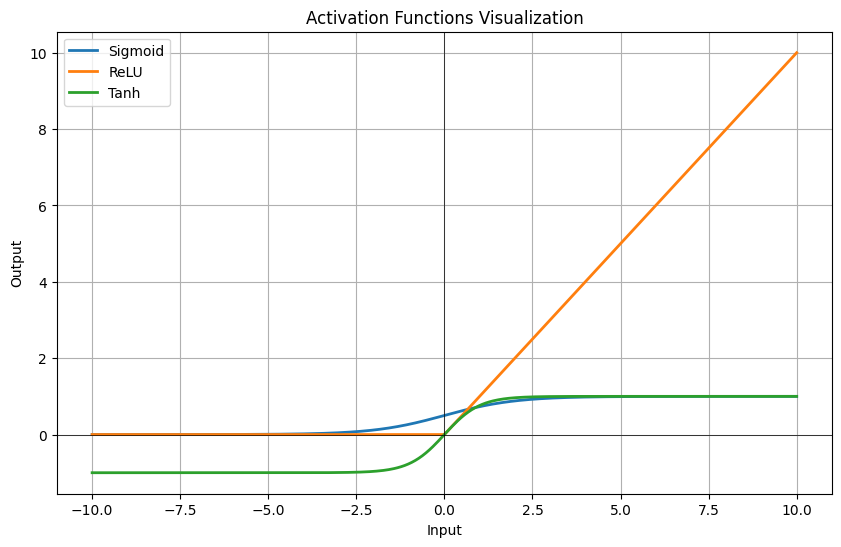

In [2]:
# Question 7: Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 400)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

plt.figure(figsize=(10, 6))

plt.plot(x, y_sigmoid, label="Sigmoid", linewidth=2)
plt.plot(x, y_relu, label="ReLU", linewidth=2)
plt.plot(x, y_tanh, label="Tanh", linewidth=2)

plt.title("Activation Functions Visualization")
plt.xlabel("Input")
plt.ylabel("Output")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()


In [3]:
# Question 8: Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=32,
    verbose=1
)

training_accuracy = history.history['accuracy'][-1]
print(f"\nTraining Accuracy: {training_accuracy * 100:.2f}%")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8831 - loss: 0.4058
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9664 - loss: 0.1092
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9799 - loss: 0.0644
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9830 - loss: 0.0525
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9869 - loss: 0.0398

Training Accuracy: 98.62%


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7822 - loss: 0.6244 - val_accuracy: 0.8555 - val_loss: 0.4104
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8616 - loss: 0.3766 - val_accuracy: 0.8625 - val_loss: 0.3865
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8776 - loss: 0.3311 - val_accuracy: 0.8679 - val_loss: 0.3653
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8847 - loss: 0.3080 - val_accuracy: 0.8704 - val_loss: 0.3751
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8922 - loss: 0.2913 - val_accuracy: 0.8694 - val_loss: 0.3614
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8975 - loss: 0.2768 - val_accuracy: 0.8818 - val_loss: 0.3383
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8995 - loss: 0.2650 - val_accuracy: 0.8666 - val_loss: 0.3811
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9032 - loss: 0.2557 - val_accurac

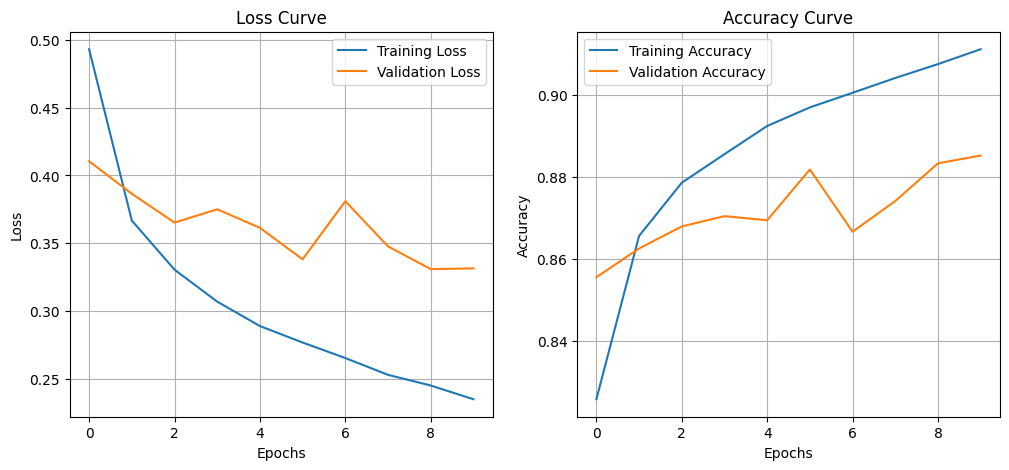

In [4]:
# Question 9: Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


**Question 10: You are working on a project for a bank that wants to automatically detect fraudulent transactions. The dataset is large, imbalanced, and contains structured features like transaction amount, merchant ID, and customer location. The goal is to classify each transaction as fraudulent or legitimate.**  
**Explain your real-time data science workflow:**  
**● How would you design a deep learning model (perceptron or multilayer NN)?**  
**● Which activation function and loss function would you use, and why?**  
**● How would you train and evaluate the model, considering class imbalance?**  
**● Which optimizer would be suitable, and how would you prevent overfitting?**
  - Problem Statement:- Detect fraudulent transactions in a large, imbalanced dataset containing structured features like transaction amount, merchant ID, and customer location.
  - Model Design:-
    - For structured data, a Multilayer Perceptron is suitable.
    - Input layer: Number of neurons = number of features.
    - Hidden layers: 2-4 layers with 64-256 neurons each.
    - Output layer: 1 neuron for binary classification (fraudulent or legitimate).
  - Activation and Loss Function:-
    - Hidden layers: ReLU:- fast, avoids vanishing gradient.
    - Output layer: Sigmoid:- outputs probability between 0 and 1.
    - Loss function: Binary Cross-Entropy:- suitable for binary classification and probability outputs.
  - Handling Class Imbalance:-
    - If fraud datasets are highly imbalanced:-
      - Resampling: Oversample fraud cases or undersample legitimate cases.
      - Class weights: Assign higher weight to fraud class during training.
      - Evaluation metrics: Use Precision, Recall, F1-score, and AUC-ROC instead of accuracy.
      - Stratified split: Maintain class distribution in train-validation split.
  - Optimizer and Overfitting Prevention
    - Optimizer: Adam - adaptive learning rate, effective for structured data.
    - Overfitting prevention:-
      - Dropout:- randomly ignore some neurons during training.
      - Early stopping:- stop training when validation loss stops improving.
      - L2 regularization:- penalize large weights to improve generalization.
      - Batch normalization:- stabilizes and speeds up training.
  - Real-Time Considerations:-
    - Model latency: Keep model small for fast predictions.
    - Feature preprocessing: Apply the same scaling and encoding as in training.
    - Monitoring: Continuously monitor performance as fraud patterns evolve.